## Monthly Retail Trade Report US (1992 - 2009)
#### Retail and Food Services Sales

The data has been collected from below source. 
Retail and Food Services Sales: https://www.census.gov/retail/index.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 8)
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

In [2]:
df = pd.read_csv("RSAFS.csv")

### EDA

In [3]:
df.head()

,realtime_start,realtime_end,date,value
0,2019-12-06,2019-12-06,1992-01-01,164095
1,2019-12-06,2019-12-06,1992-02-01,164213
2,2019-12-06,2019-12-06,1992-03-01,163721
3,2019-12-06,2019-12-06,1992-04-01,164709
4,2019-12-06,2019-12-06,1992-05-01,165612


In [4]:
df = df.iloc[:,2:4]

In [5]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [6]:
df.head()

,date,value
0,1992-01-01,164095
1,1992-02-01,164213
2,1992-03-01,163721
3,1992-04-01,164709
4,1992-05-01,165612


In [7]:
df.tail()

,date,value
329,2019-06-01,520055
330,2019-07-01,523922
331,2019-08-01,526862
332,2019-09-01,525157
333,2019-10-01,526540


In [8]:
df.describe()

,value
count,334.00000
mean,331589.04491
std,98914.61643
min,163721.00000
25%,246614.50000
50%,337718.00000
75%,407166.25000
max,526862.00000


In [9]:
df.shape

(334, 2)

In [10]:
df.isna().sum()

date     0
value    0
dtype: int64

In [11]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)

In [12]:
df.head()

,date,value
0,1992-01-01,164095
1,1992-02-01,164213
2,1992-03-01,163721
3,1992-04-01,164709
4,1992-05-01,165612


In [13]:
df = df.set_index('date')

In [14]:
df.head()

,value
date,
1992-01-01,164095
1992-02-01,164213
1992-03-01,163721
1992-04-01,164709
1992-05-01,165612


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10dc6fe48>]],
      dtype=object)

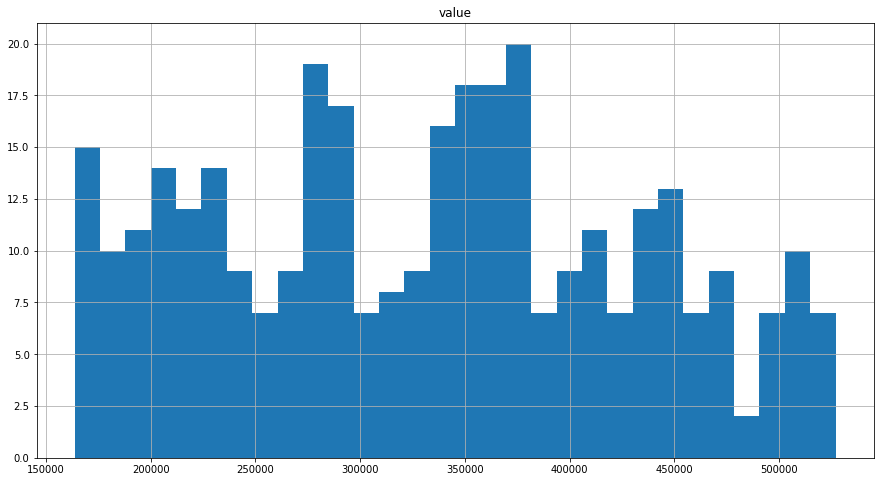

In [15]:
df.hist(bins=30, figsize=(15,8))

In [16]:
### Checking the trend of the data

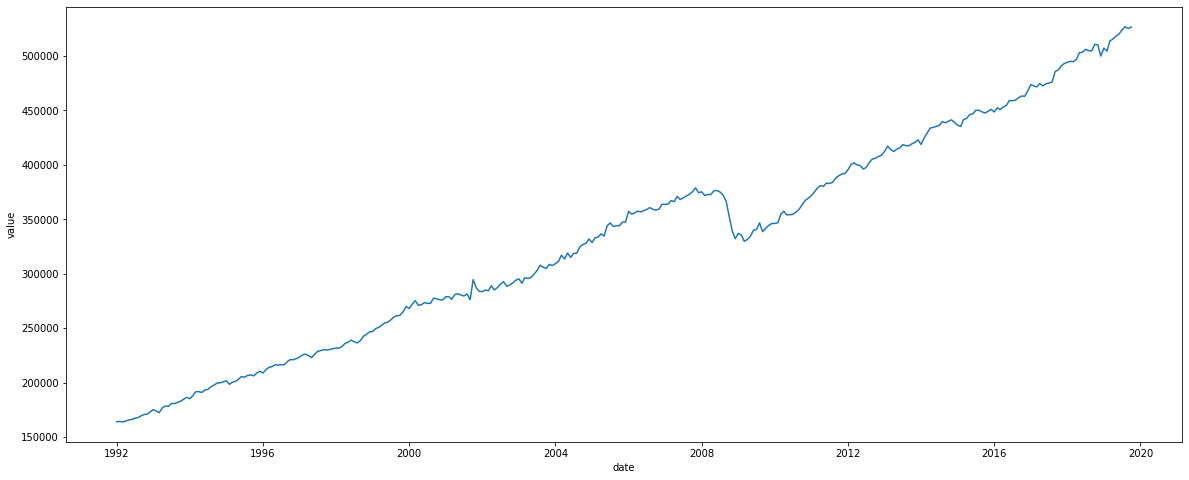

In [17]:
# plotting basic graph
#plt.figure(figsize=(15,8))
plt.xlabel("date")
plt.ylabel("value")
plt.plot(df)

Looks like we have an upward trend

Additive time series:
Value = Base Level + Trend + Seasonality + Error

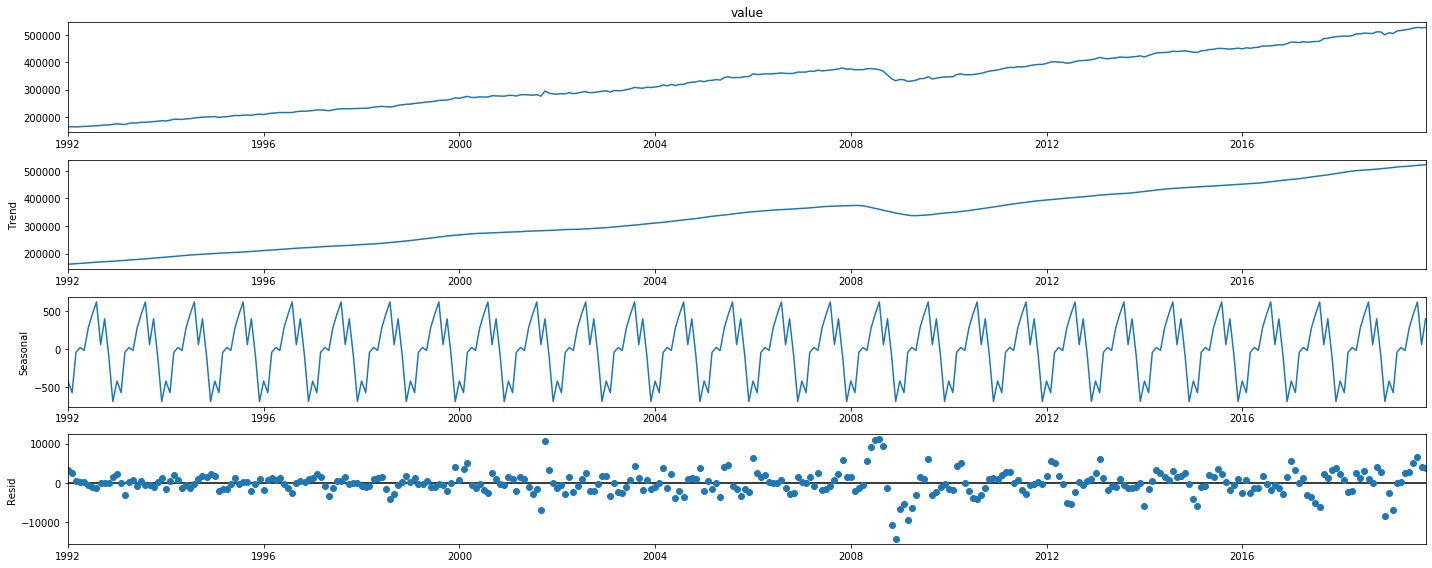

In [18]:
decomposition = sm.tsa.seasonal_decompose(df["value"], model='additive', extrapolate_trend='freq')
#decompositionm = sm.tsa.seasonal_decompose(df["value"], model='multiplicative', extrapolate_trend='freq')
fig = decomposition.plot()
#afig = decompositionm.plot()
plt.show()

### Checking if the data is stationary

In [19]:
def check_stationarity(df):
    # determine rolling statistics
    # rolling mean
    rolmean = df.rolling(window=12).mean()
    # rolling std
    rolstd = df.rolling(window=12).std()
    
    # plot rolling mean, std with the original dataset
    orig = plt.plot(df, color = 'black', label = 'Sales')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'blue', label = 'Rolling Standard Deviation')
    plt.title("Comparing rolling mean and std with the sales")
    plt.legend(loc='best')
    plt.show(block=False)
    
    #dicky-fuller test
    result = adfuller(df['value'], autolag='AIC')
    print("Results of the Dicky-Fuller Test: ")
    dickyout = pd.Series(result[0:4], index=["ADF Statistics", "p-value", "Number of Lags Used", "Number of Observations"])
    for key, value in result[4].items():
        dickyout["Critical Values (%s)" %key] = value
    
    print(dickyout)

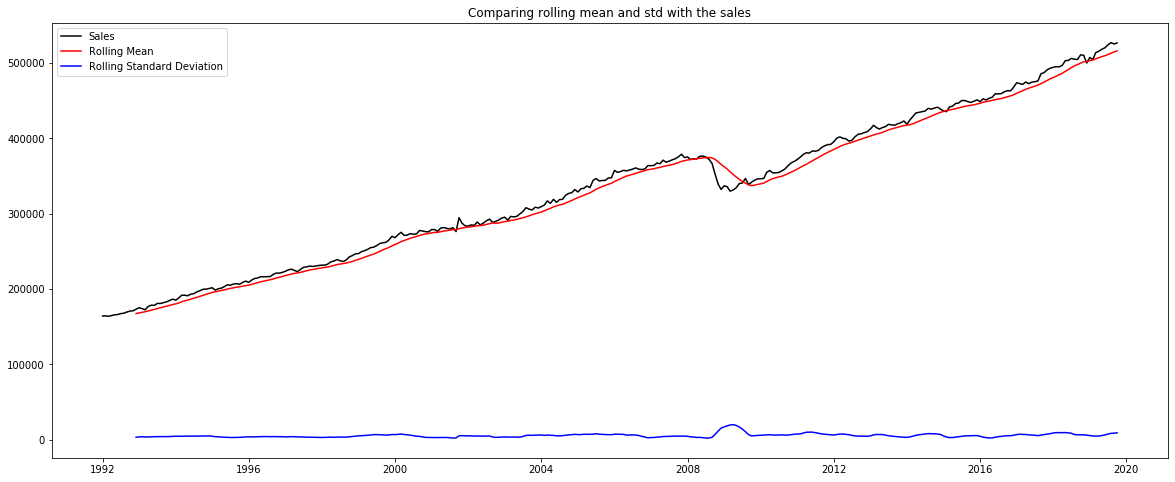

Results of the Dicky-Fuller Test: 
ADF Statistics              0.619305
p-value                     0.988082
Number of Lags Used         0.000000
Number of Observations    333.000000
Critical Values (1%)       -3.450141
Critical Values (5%)       -2.870259
Critical Values (10%)      -2.571415
dtype: float64


In [20]:
check_stationarity(df)

### Log transformation

In [21]:
# Transforming data into logscale to convert the data into stationary form. Estimating the trend.

In [22]:
df_log = np.log(df)

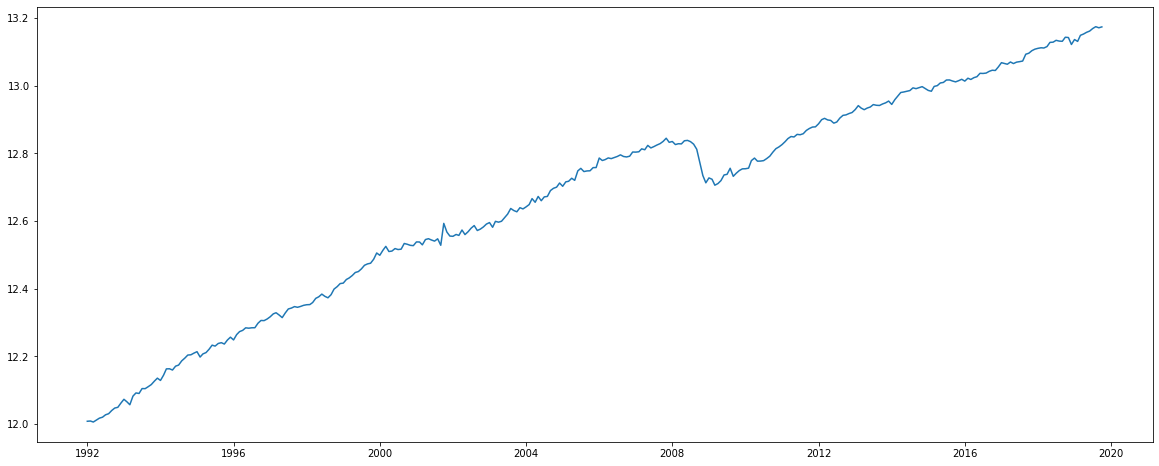

In [23]:
plt.plot(df_log)

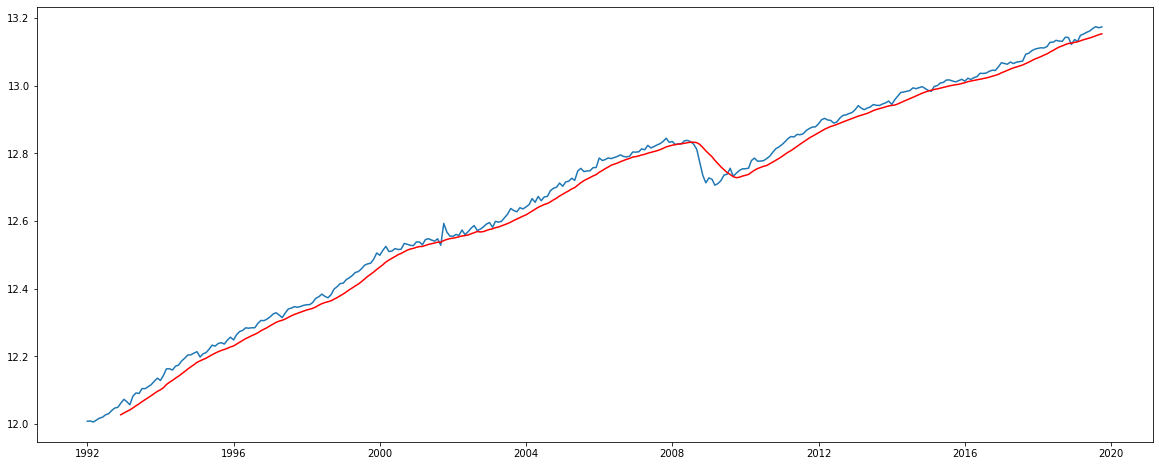

In [24]:
# calculating moving average of the log transformed data

moving_avg = df_log.rolling(12).mean()
plt.plot(df_log)
plt.plot(moving_avg, color='red')

In [25]:
df_log_moving_avg_diff = df_log - moving_avg
df_log_moving_avg_diff.dropna(inplace=True)

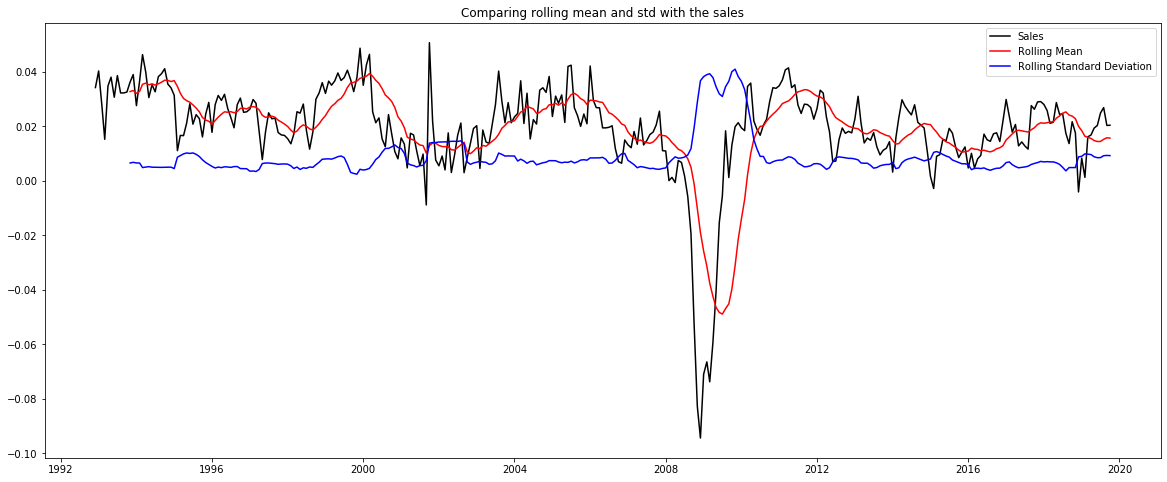

Results of the Dicky-Fuller Test: 
ADF Statistics             -4.137003
p-value                     0.000841
Number of Lags Used         1.000000
Number of Observations    321.000000
Critical Values (1%)       -3.450887
Critical Values (5%)       -2.870586
Critical Values (10%)      -2.571590
dtype: float64


In [26]:
check_stationarity(df_log_moving_avg_diff)

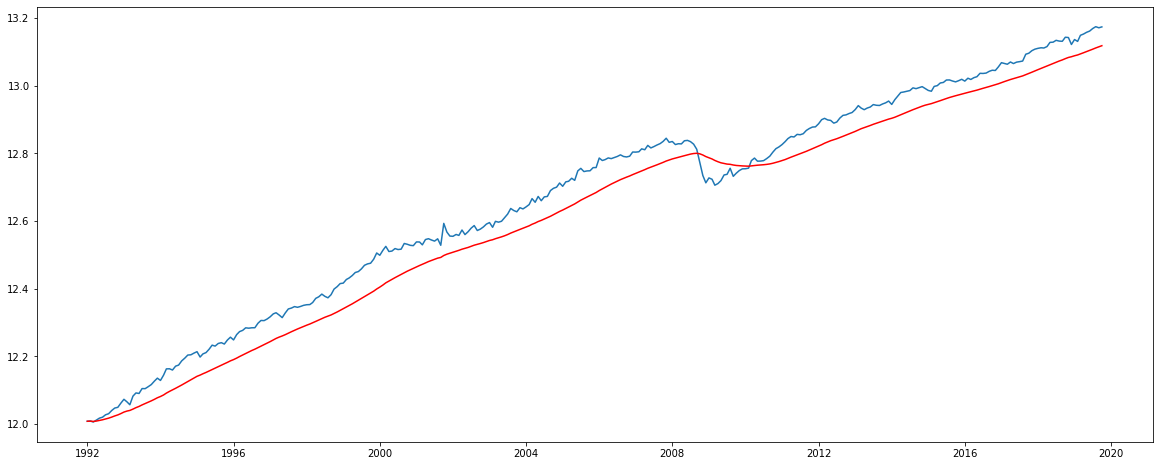

In [27]:
# exponentially weighted moving average

expwighted_avg = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(df_log)
plt.plot(expwighted_avg, color='red')

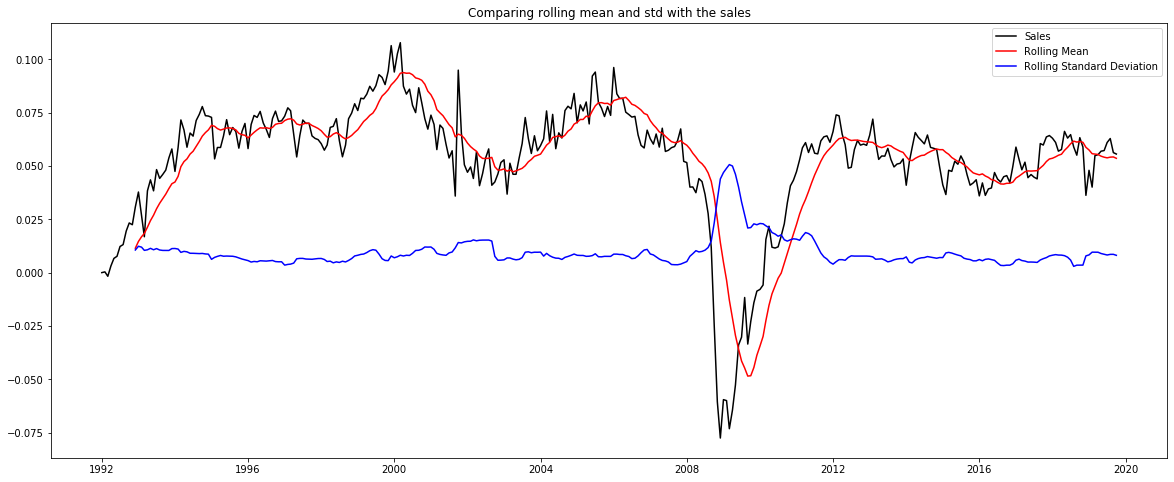

Results of the Dicky-Fuller Test: 
ADF Statistics             -2.927614
p-value                     0.042230
Number of Lags Used         1.000000
Number of Observations    332.000000
Critical Values (1%)       -3.450201
Critical Values (5%)       -2.870285
Critical Values (10%)      -2.571429
dtype: float64


In [28]:
df_log_ewma_diff = df_log - expwighted_avg
check_stationarity(df_log_ewma_diff)

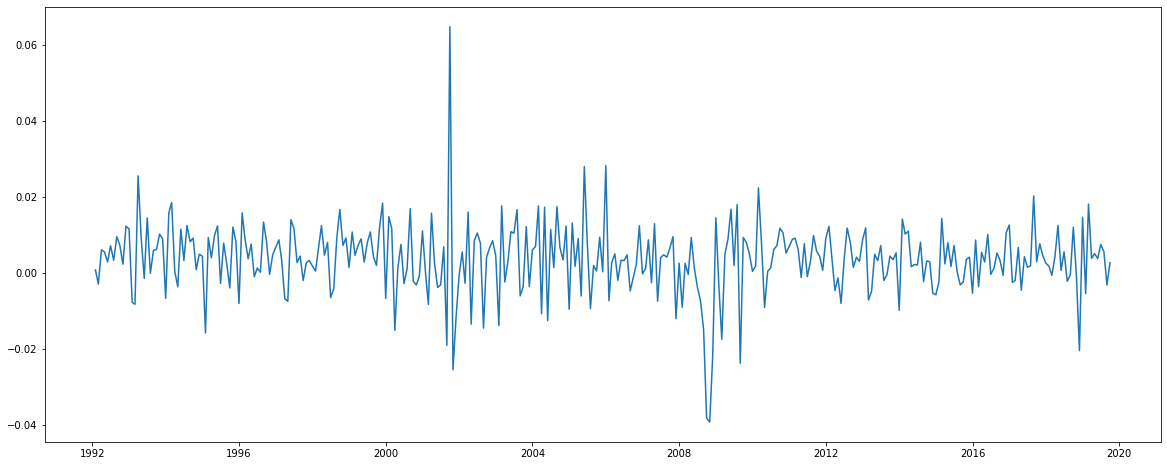

In [29]:
# Differencing

df_log_diff = df_log - df_log.shift(1)
plt.plot(df_log_diff)

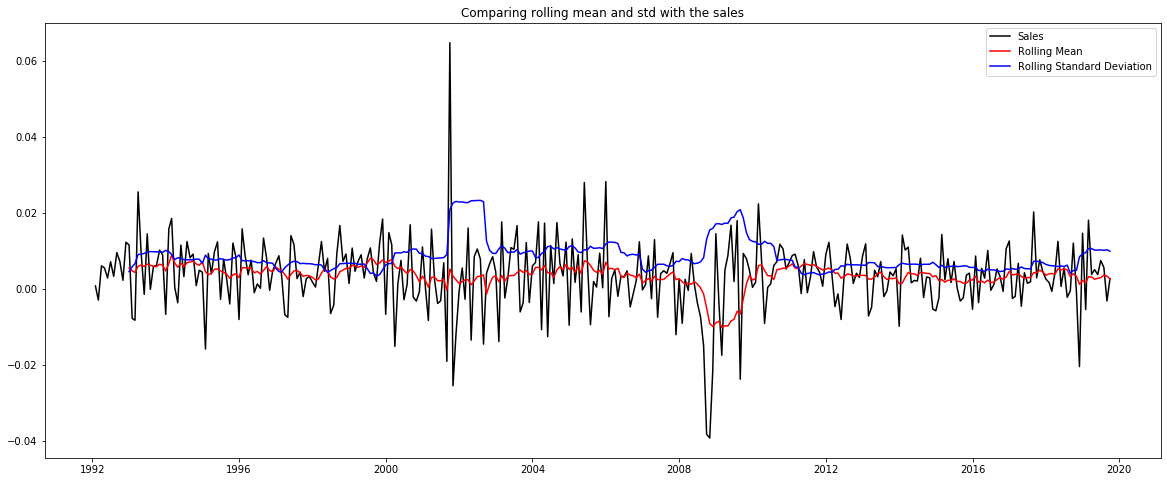

Results of the Dicky-Fuller Test: 
ADF Statistics            -20.118317
p-value                     0.000000
Number of Lags Used         0.000000
Number of Observations    332.000000
Critical Values (1%)       -3.450201
Critical Values (5%)       -2.870285
Critical Values (10%)      -2.571429
dtype: float64


In [30]:
df_log_diff.dropna(inplace=True)
check_stationarity(df_log_diff)

In [31]:
# ARIMA

In [32]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [33]:
lag_acf = acf(df_log_diff, nlags=20)
lag_pacf = pacf(df_log_diff, nlags=20, method='ols')

/Users/roshanwahane/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


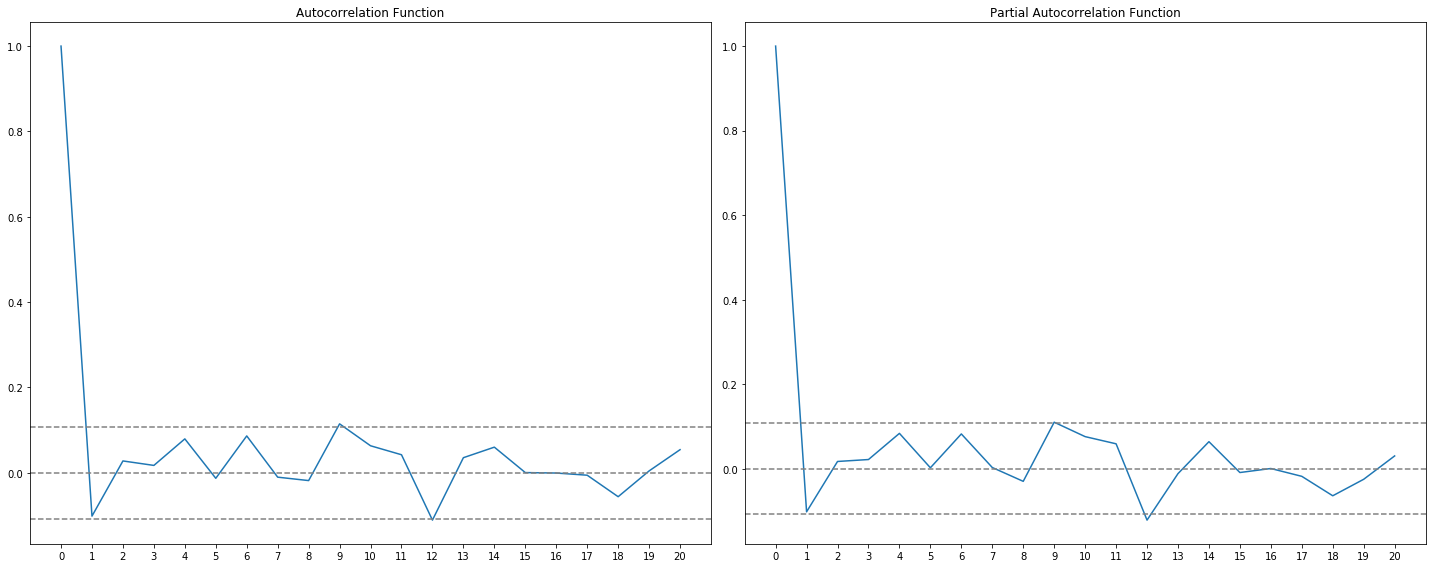

In [34]:
#Plot ACF: 
plt.subplot(121) 
plt.xticks(range(0,21))
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.subplot(122) 
plt.xticks(range(0,21))
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [35]:
from statsmodels.tsa.arima_model import ARIMA

/Users/roshanwahane/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/roshanwahane/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 0.0287')

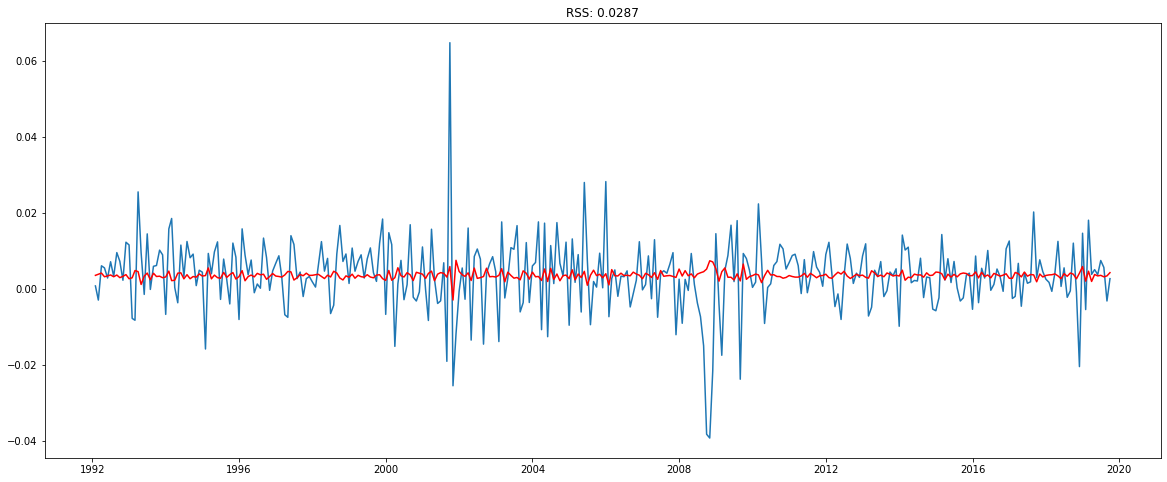

In [36]:
# AR Model

model = ARIMA(df_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(df_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-df_log_diff["value"])**2))

/Users/roshanwahane/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/roshanwahane/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 0.0287')

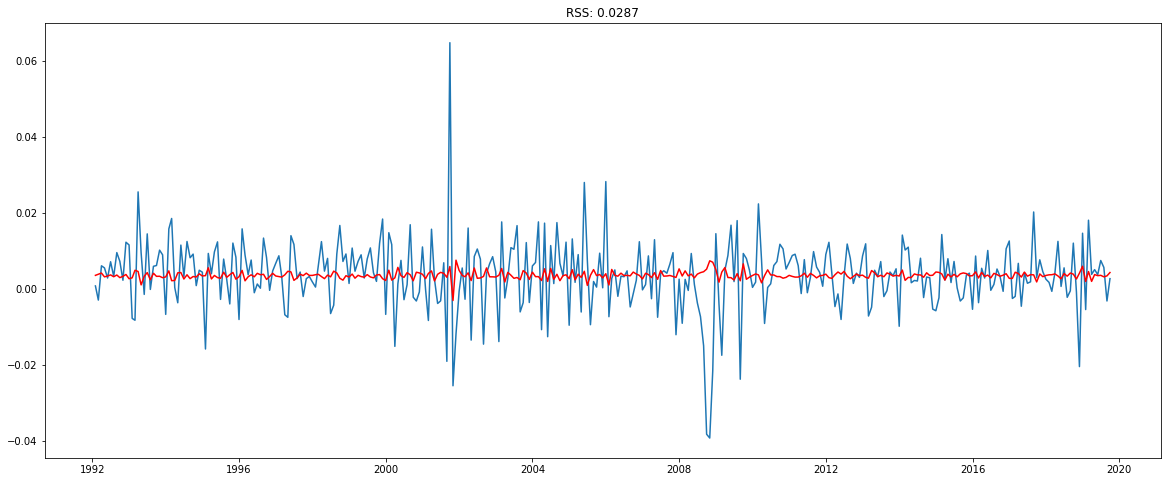

In [37]:
# MA Model

model = ARIMA(df_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(df_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-df_log_diff["value"])**2))

/Users/roshanwahane/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/roshanwahane/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 0.0284')

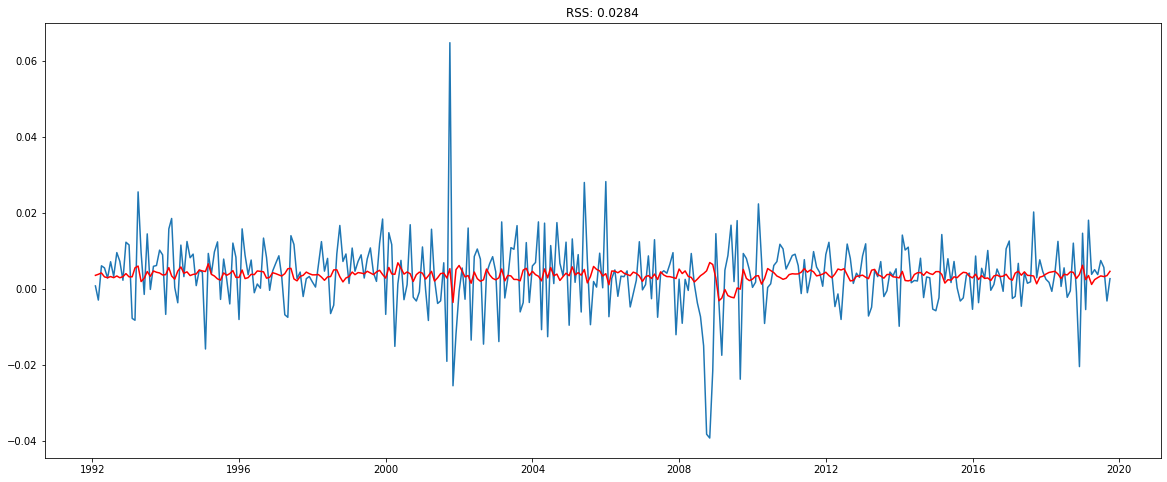

In [38]:
# Combined ARIMA model

model = ARIMA(df_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(df_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-df_log_diff["value"])**2))

In [39]:
# Data transformation. Taking data back to its original form as it is in log form now so if we apply exponential function on the data then it will go back to its original form.

In [40]:
pred_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
pred_ARIMA_diff.head()

date
1992-02-01    0.003504
1992-03-01    0.003776
1992-04-01    0.004134
1992-05-01    0.003108
1992-06-01    0.002876
dtype: float64

In [41]:
predictions_ARIMA_diff_cumsum = pred_ARIMA_diff.cumsum() 
predictions_ARIMA_diff_cumsum.head()

date
1992-02-01    0.003504
1992-03-01    0.007281
1992-04-01    0.011414
1992-05-01    0.014522
1992-06-01    0.017398
dtype: float64

In [42]:
predictions_ARIMA_log = pd.Series(df_log['value'].iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

date
1992-01-01    12.008201
1992-02-01    12.011705
1992-03-01    12.015481
1992-04-01    12.019615
1992-05-01    12.022723
dtype: float64

In [43]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#rms = sqrt(mean_squared_error(y_actual, y_predicted))

Text(0.5, 1.0, 'RMSE: 22334.66')

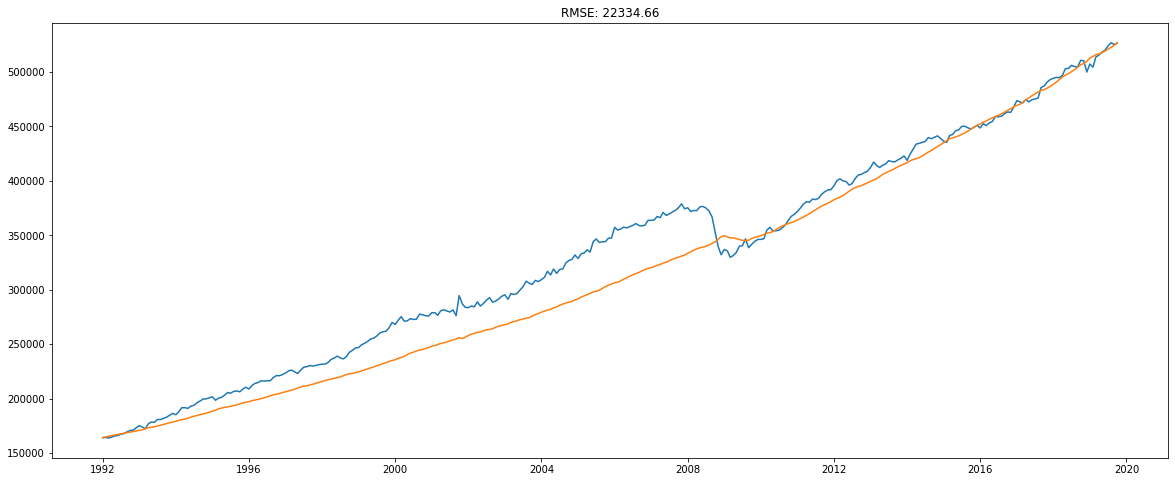

In [44]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df['value'])
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.2f'% sqrt(mean_squared_error(predictions_ARIMA, df['value'])))


In [46]:
predictions_ARIMA.head()

date
1992-01-01    164095.000000
1992-02-01    164671.058503
1992-03-01    165294.075366
1992-04-01    165978.770948
1992-05-01    166495.374139
dtype: float64

In [47]:
df.head()

,value
date,
1992-01-01,164095
1992-02-01,164213
1992-03-01,163721
1992-04-01,164709
1992-05-01,165612


In [48]:
df

,value
date,
1992-01-01,164095
1992-02-01,164213
1992-03-01,163721
1992-04-01,164709
1992-05-01,165612
...,...
2019-06-01,520055
2019-07-01,523922
2019-08-01,526862


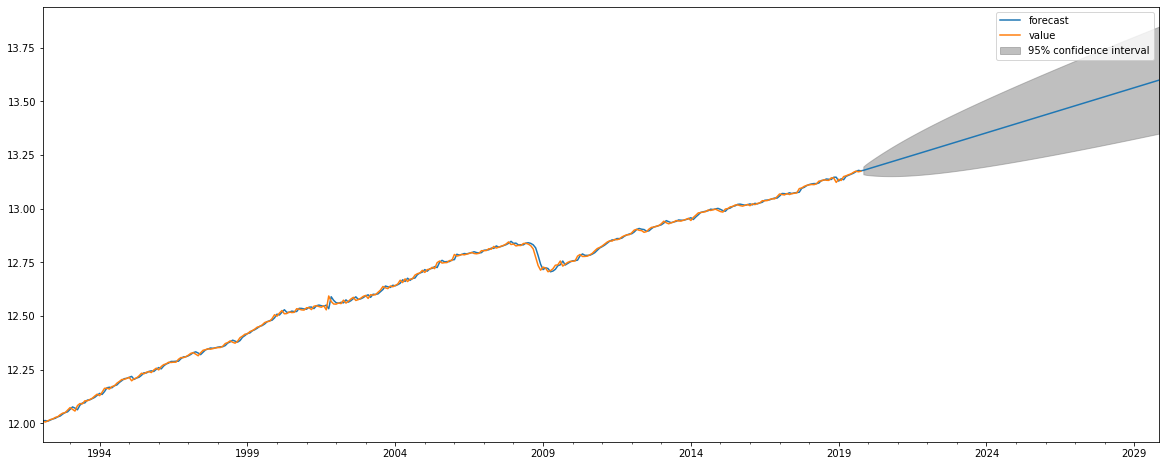

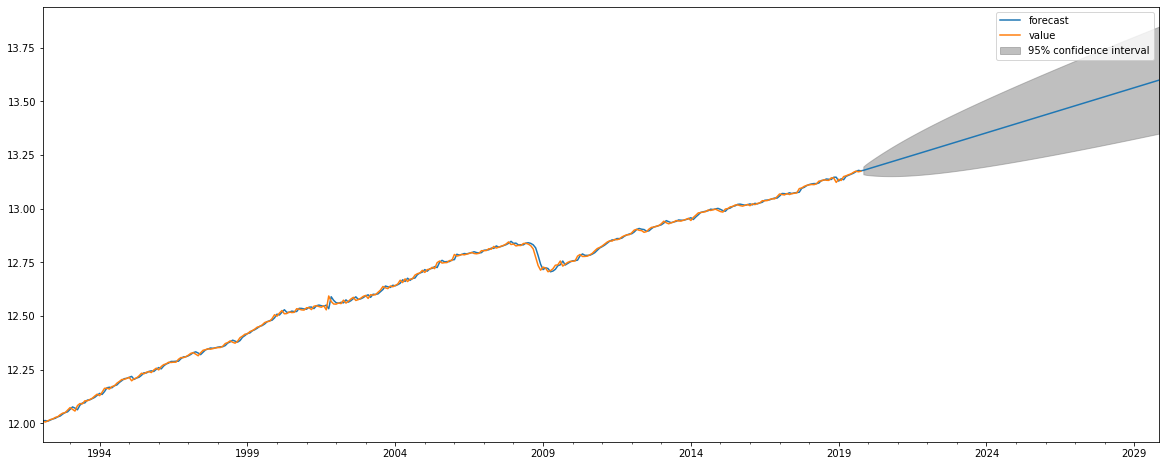

In [49]:
results_ARIMA.plot_predict(1,454)

In [50]:
results_ARIMA.forecast(steps=120)

(array([13.17816136, 13.18179409, 13.18529346, 13.18875706, 13.1922148 ,
        13.19567538, 13.19914087, 13.20261138, 13.20608646, 13.20956557,
        13.21304815, 13.21653376, 13.22002195, 13.22351239, 13.22700475,
        13.23049878, 13.23399424, 13.23749093, 13.24098868, 13.24448735,
        13.24798681, 13.25148695, 13.25498768, 13.2584889 , 13.26199057,
        13.26549261, 13.26899497, 13.27249761, 13.27600049, 13.27950357,
        13.28300684, 13.28651026, 13.2900138 , 13.29351747, 13.29702123,
        13.30052507, 13.30402899, 13.30753297, 13.31103701, 13.31454109,
        13.31804521, 13.32154936, 13.32505355, 13.32855776, 13.33206199,
        13.33556625, 13.33907052, 13.3425748 , 13.34607909, 13.3495834 ,
        13.35308771, 13.35659204, 13.36009637, 13.3636007 , 13.36710504,
        13.37060938, 13.37411373, 13.37761808, 13.38112244, 13.38462679,
        13.38813115, 13.39163551, 13.39513987, 13.39864423, 13.4021486 ,
        13.40565296, 13.40915733, 13.4126617 , 13.4